In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from scipy.special import gammaln
import h5py as h5
import pandas as pd
import seaborn as sns
from scipy.signal import hilbert
df = pd.read_pickle('fits/cluster_results_rank.pkl')

## Graphs

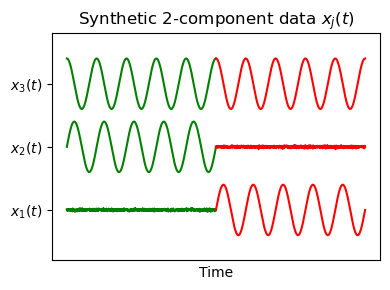

In [ ]:
n = 1000
scale = 0.1
t = np.linspace(0, 5, n)

fig,axs = plt.subplots(1,1,figsize=(4,3),layout='tight',sharey=False,width_ratios=[1])
noises = np.zeros((3,n))
noises[2] = np.random.uniform(-scale/2, scale/2, n)
noises[2] = np.random.standard_normal(n)*scale/4
signal6 = np.zeros((3,n))
signal6[0] = np.cos(2*np.pi*t)
signal6[1] = np.sin(2*np.pi*t) - 2.5
signal6[2] = np.zeros(n) - 5
cos_signal6 = np.angle(hilbert((signal6+noises)-np.mean(signal6+noises, axis=1)[:,None]))+np.array([0,-7,-14])[:,None]
axs.plot(t,signal6.T+noises.T,label='Signal 1',color='green')

noises = np.zeros((3,n))
noises[1] = np.random.uniform(-scale/2, scale/2, n)
noises[1] = np.random.standard_normal(n)*scale/4
signal7 = np.zeros((3,n))
signal7[0] = np.cos(2*np.pi*t)
signal7[2] = np.sin(2*np.pi*t) - 5
signal7[1] = np.zeros(n) - 2.5
cos_signal7 = np.angle(hilbert((signal7+noises)-np.mean(signal7+noises, axis=1)[:,None]))+np.array([0,-7,-14])[:,None]
axs.plot(t+5,signal7.T+noises.T,label='Signal 1',color='red')

axs.set_xticks([])
axs.set_yticks([-5,-2.5,0],[r'$x_1(t)$',r'$x_2(t)$',r'$x_3(t)$'])
axs.set_ylim(-7, 2)
axs.set_title(r'Synthetic 2-component data $x_j(t)$')
axs.set_xlabel('Time')
fig.savefig('figures/cluster_results_signals.pdf',bbox_inches='tight')

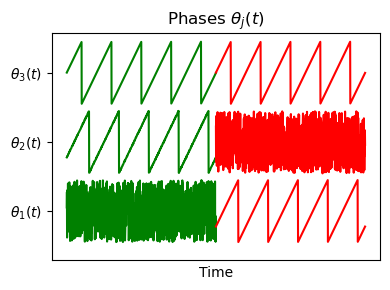

In [42]:
fig,axs = plt.subplots(1,1,figsize=(4,3),layout='tight',sharey=False,width_ratios=[1])

axs.plot(t,cos_signal6.T+noises.T,label='Signal 1',color='green')
axs.plot(t+5,cos_signal7.T+noises.T,label='Signal 1',color='red')
axs.set_xticks([])
axs.set_yticks([-14,-7,0],[r'$\theta_1(t)$',r'$\theta_2(t)$',r'$\theta_3(t)$'])
axs.set_ylim(-19, 4)
axs.set_title(r'Phases $\theta_j(t)$')
axs.set_xlabel('Time')
fig.savefig('figures/cluster_results_phases.pdf',bbox_inches='tight')

/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  posy = float(self.convert_yunits(self._y))
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/matplotlib/text.py:895: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  y = float(self.convert_yunits(self._y))
/home/ansol/miniconda3/envs/hcp/lib/python3.12/site-packages/matplotlib/text.py:754: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in th

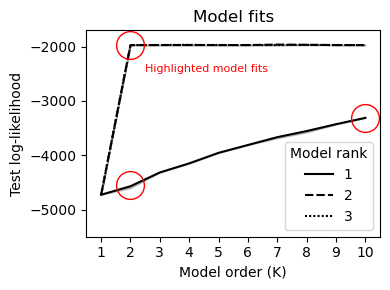

In [ ]:
fig,axs = plt.subplots(1,1,figsize=(4,3),layout='tight',sharey=False,width_ratios=[1])

#filter out modelname=='ACG' and rank==1
df_tmp = df[(df['modelname']=='ACG')]
#rename column 'rank' to 'Model rank'
df_tmp = df_tmp.rename(columns={'rank':'Model rank'})

sns.lineplot(data=df_tmp,x='K',y='test_loglik',ax=axs,markers=False,color='black',style='Model rank')
axs.set_xlabel('Model order (K)')
axs.set_ylabel('')
sns.move_legend(axs, "lower right") #, bbox_to_anchor=(1.2, 1), title='Model rank', title_fontsize=8, fontsize=8
val = df_tmp[(df_tmp['K']==2)&(df_tmp['inner']==0)&(df_tmp['Model rank']==2)]['test_loglik']
axs.plot(2,val,'ro',fillstyle='none',markersize=20)
axs.text(2.5,val-500,'Highlighted model fits',color='red',fontsize=8)
val2 = df_tmp[(df_tmp['K']==2)&(df_tmp['inner']==0)&(df_tmp['Model rank']==1)]['test_loglik']
axs.plot(2,val2,'ro',fillstyle='none',markersize=20)
val3 = df_tmp[(df_tmp['K']==10)&(df_tmp['inner']==0)&(df_tmp['Model rank']==1)]['test_loglik']
axs.plot(10,val3,'ro',fillstyle='none',markersize=20)
axs.set_ylim(-5500, -1700)
axs.set_xlim(0.5,10.5)
axs.set_xticks([1,2,3,4,5,6,7,8,9,10]);
axs.set_ylabel('Test log-likelihood')
axs.set_title('Model fits')
fig.savefig('figures/cluster_results_model_fits.pdf',bbox_inches='tight')

## spheres

In [44]:
def draw_sphere(ax,num_lines=20):

    # draw sphere
    u, v = np.mgrid[0:2*np.pi:2*num_lines*1j, 0:np.pi:num_lines*1j]
    # u, v = np.mgrid[0:2*np.pi:40j, 0:np.pi:20j]
    x = np.cos(u)*np.sin(v)
    y = np.sin(u)*np.sin(v)
    z = np.cos(v)

    ax.plot_wireframe(x, y, z, color="k", alpha=0.1, zorder=3)
    # remove ticks
    ax.set_xticks([-1,1])
    ax.set_yticks([-1,1])
    ax.set_zticks([-1,1])
    ax.set_aspect('equal')
    
    # remove axes
    ax.set_axis_off()

    # keep the three main axes but remove the gray area in the middle of the 3d plot
    ax.xaxis.pane.fill = False
    ax.yaxis.pane.fill = False
    ax.zaxis.pane.fill = False
    ax.grid(False)
    
    return ax

def add_points_to_sphere(ax,P):
    num_points = P.shape[1] 
    # plot every second as red and every other second as green
    ax.scatter(P[0,:num_points//2], P[1,:num_points//2], P[2,:num_points//2], color='r', s=1, alpha=0.5,zorder=1)
    ax.scatter(P[0,num_points//2:], P[1,num_points//2:], P[2,num_points//2:], color='g', s=1, alpha=0.5,zorder=1)
    if P.shape[1]<3:
        ax.plot([0, P[0,0]], [0, P[1,0]], [0, P[2,0]], color='r')
        ax.plot([0, P[0,1]], [0, P[1,1]], [0, P[2,1]], color='g')

    return ax

def get_cmaps():
    # Initialize a dictionary to store the colormaps
    cmaps = []
    # cmaps[1]: White to Pink
    cmaps.append(np.column_stack([np.linspace(1, 0, 256), np.linspace(1, 0.5, 256), np.linspace(1, 0.5, 256)]))
    # cmaps[2]: White to Purple
    cmaps.append(np.column_stack([np.linspace(1, 0.5, 256), np.linspace(1, 0, 256), np.linspace(1, 0.5, 256)]))
    # cmaps[3]: White to Blue
    cmaps.append(np.column_stack([np.linspace(1, 0, 256), np.linspace(1, 0, 256), np.linspace(1, 1, 256)]))
    # cmaps[4]: White to Cyan
    cmaps.append(np.column_stack([np.linspace(1, 0, 256), np.linspace(1, 1, 256), np.linspace(1, 1, 256)]))
    # cmaps[5]: White to Magenta
    cmaps.append(np.column_stack([np.linspace(1, 1, 256), np.linspace(1, 0, 256), np.linspace(1, 1, 256)]))
    # cmaps[6]: White to Yellow
    cmaps.append(np.column_stack([np.linspace(1, 1, 256), np.linspace(1, 1, 256), np.linspace(1, 0, 256)]))
    # cmaps[7]: White to Orange
    cmaps.append(np.column_stack([np.linspace(1, 1, 256), np.linspace(1, 0.5, 256), np.linspace(1, 0, 256)]))
    # cmaps[8]: White to Navy
    cmaps.append(np.column_stack([np.linspace(1, 0, 256), np.linspace(1, 0, 256), np.linspace(1, 0.5, 256)]))
    # cmaps[9]: White to Teal
    cmaps.append(np.column_stack([np.linspace(1, 0, 256), np.linspace(1, 0.5, 256), np.linspace(1, 0.5, 256)]))
    # cmaps[10]: White to Violet
    cmaps.append(np.column_stack([np.linspace(1, 0.5, 256), np.linspace(1, 0, 256), np.linspace(1, 1, 256)]))
    return cmaps

def add_contour_to_sphere(ax,params,num_grid_points=1000,model='watson',threshold=0.95,az=None,el=None):
    K = params['pi'].shape[0]
    # get faces
    theta, phi = np.linspace(0, np.pi, num_grid_points), np.linspace(0, 2 * np.pi, 2*num_grid_points)
    theta, phi = np.meshgrid(theta, phi)
    r = 1  # radius of the sphere

    # Sphere coordinates
    X = r * np.sin(theta) * np.cos(phi)
    Y = r * np.sin(theta) * np.sin(phi)
    Z = r * np.cos(theta)
    # Create the vertices for all faces using slicing and reshaping
    X_faces = np.array([X[:-1, :-1], X[1:, :-1], X[1:, 1:], X[:-1, 1:]]).transpose(1, 2, 0).reshape(-1, 4, 3)
    Y_faces = np.array([Y[:-1, :-1], Y[1:, :-1], Y[1:, 1:], Y[:-1, 1:]]).transpose(1, 2, 0).reshape(-1, 4, 3)
    Z_faces = np.array([Z[:-1, :-1], Z[1:, :-1], Z[1:, 1:], Z[:-1, 1:]]).transpose(1, 2, 0).reshape(-1, 4, 3)

    # Stack X, Y, Z to create the full vertex list (Nx4x3 array)
    verts = np.stack((X_faces, Y_faces, Z_faces), axis=-1).reshape(-1, 4, 3)
    vert_midpoint = np.mean(verts, axis=1)

    if az is not None:
        R_az = np.array([[np.cos(az),-np.sin(az),0],[np.sin(az),np.cos(az),0],[0,0,1]])
        R_el = np.array([[1,0,0],[0,np.cos(el),-np.sin(el)],[0,np.sin(el),np.cos(el)]])
        vert_location = R_az @ R_el @ vert_midpoint.T
        #binarize
        vert_location = (vert_location[0]>0).astype(bool)

    # vert_midpoint = np.array(vert_midpoint)
    num_faces = len(verts)
    
    #calculate colors
    c = np.zeros((num_faces,K))
    for k in range(K):
        if model=='watson':
            M2 = kummer_log(params['kappa'][k],0.5,1.5)
            Cp = gammaln(1.5)-np.log(2)-1.5*np.log(np.pi)-M2

            c[:,k] = np.log(params['pi'][k]) + Cp + params['kappa'][k]*((params['mu'][:,k] @ vert_midpoint.T)**2)

            # for i in range(num_faces):
            #     c[i,k] = np.log(params['pi'][k]) + Cp + params['kappa'][k]*((params['mu'][:,k] @ vert_midpoint[i])**2)
        elif model=='ACG':
            Cp = gammaln(1.5)-np.log(2)-1.5*np.log(np.pi)
            logdeta = np.log(np.linalg.det(params['L'][k]))
            L_inv = np.linalg.inv(params['L'][k])

            for i in range(num_faces):
                B = vert_midpoint[i] @ L_inv @ vert_midpoint[i]
                c[i,k] = np.log(params['pi'][k]) + Cp-0.5*logdeta-1.5*np.log(B)
        else:
            raise ValueError('Model not implemented')
        
    # normalize to values between 0 and 1
    for k in range(K):
        c[:,k] = (c[:,k] - c[:,k].min()) / (c[:,k].max() - c[:,k].min())
    # print(np.min(c),np.max(c[c<1]))

    # set values below threshold to 0
    c_show = np.zeros(c.shape,dtype=bool)
    for k in range(K):  
        c_show[:,k] = c[:,k] > threshold
        # print(c_show[:,k].sum())
        c[c_show[:,k],k] = (c[c_show[:,k],k] - c[c_show[:,k],k].min()) / (c[c_show[:,k],k].max() - c[c_show[:,k],k].min())

    #create K color maps
    cmaps = get_cmaps()
    # norm = plt.Normalize(c.min(), c.max())
    colors = np.zeros((K,num_faces,4))
    for k in range(K):
        colors[k,c_show[:,k],:3] = cmaps[k][(c[c_show[:,k],k]*255).astype(np.uint8)]
        colors[k,c_show[:,k],-1] = 1.0
    
        # Plot the collection of faces
        for foreground in [True,False]:
            if foreground:
                poly = Poly3DCollection(verts[~vert_location], facecolors=colors[k][~vert_location], edgecolor='k', linewidths=0,zorder=2)
            else:
                poly = Poly3DCollection(verts[vert_location], facecolors=colors[k][vert_location], edgecolor='k', linewidths=0,zorder=4)
            ax.add_collection3d(poly)
    return ax


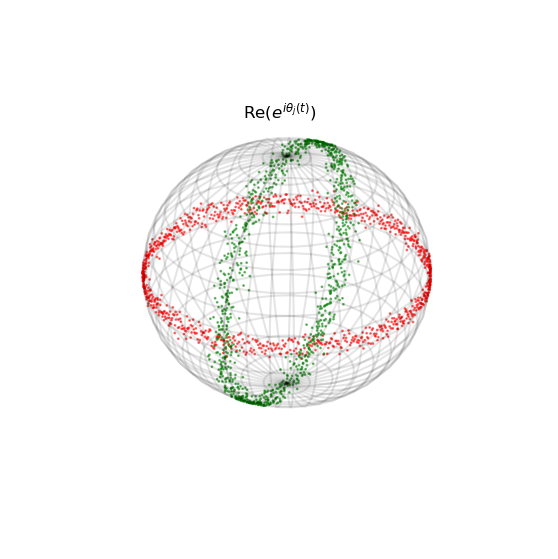

In [45]:
data = h5.File('fits/cluster_data.h5','r')['data'][:]
# just points
fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(7,7))
ax = draw_sphere(ax)

ax = add_points_to_sphere(ax,data.T)
ax.view_init(30, 25)
ax.text2D(0.5, 0.8, r'$\operatorname{Re}(e^{i\theta_j(t)})$', transform=ax.transAxes, fontsize=12, ha='center')
fig.savefig('figures/cluster_results_points_sphere.pdf',bbox_inches='tight')

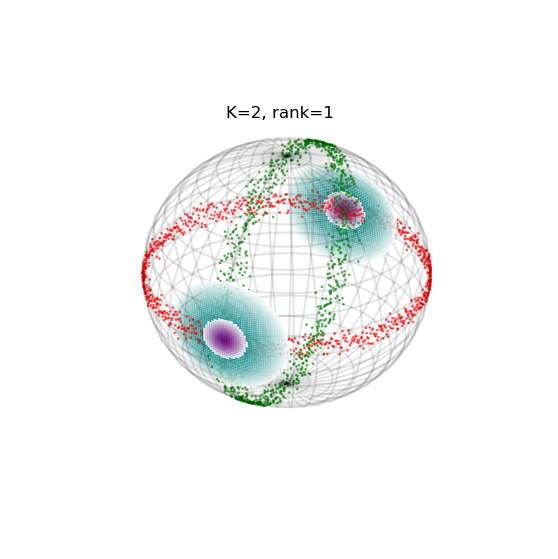

In [46]:
# ACG K=2
K = 2
params = {}
params['pi'] = np.loadtxt('fits/centroids/ACG_centroids_pi_K=2_rank=1.txt')
params['L'] = np.zeros((2,3,3))
for k in range(K):
    params['L'][k] = np.loadtxt('fits/centroids/ACG_centroids_K=2'+str(k)+'_rank=1.txt')

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(7,7))
ax=draw_sphere(ax)
ax=add_contour_to_sphere(ax,params,model='ACG',threshold=0.75,num_grid_points=200,az=30,el=25)
ax=add_points_to_sphere(ax,data.T)
ax.view_init(30, 25)
#add text to the plot like a title but with a specified position
ax.text2D(0.5, 0.8, 'K=2, rank=1', transform=ax.transAxes, fontsize=12, ha='center')
fig.savefig('figures/ACG_K=2_rank=1.pdf',bbox_inches='tight')

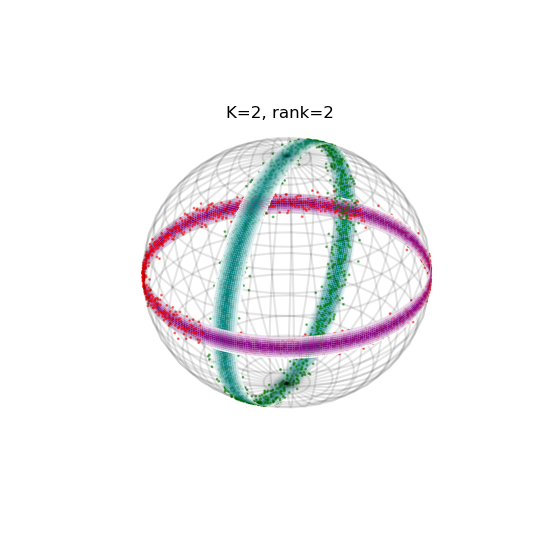

In [47]:
# ACG K=2
K = 2
params = {}
params['pi'] = np.loadtxt('fits/centroids/ACG_centroids_pi_K=2_rank=2.txt')
params['L'] = np.zeros((2,3,3))
for k in range(K):
    params['L'][k] = np.loadtxt('fits/centroids/ACG_centroids_K=2'+str(k)+'_rank=2.txt')

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(7,7))
ax=draw_sphere(ax)
ax=add_contour_to_sphere(ax,params,model='ACG',threshold=0.75,num_grid_points=200,az=30,el=25)
ax=add_points_to_sphere(ax,data.T)
ax.view_init(30, 25)
ax.text2D(0.5, 0.8, 'K=2, rank=2', transform=ax.transAxes, fontsize=12, ha='center')
fig.savefig('figures/ACG_K=2_rank=2.pdf',bbox_inches='tight')

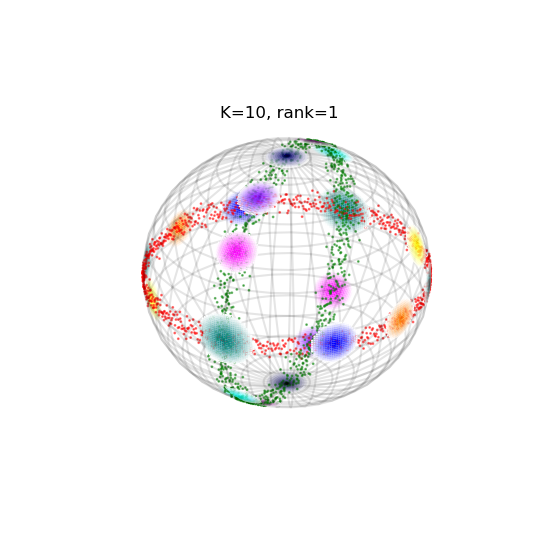

In [48]:
# ACG K=10
K = 10
params = {}
params['pi'] = np.loadtxt('fits/centroids/ACG_centroids_pi_K='+str(K)+'_rank=1.txt')
params['L'] = np.zeros((K,3,3))
for k in range(K):
    params['L'][k] = np.loadtxt('fits/centroids/ACG_centroids_K='+str(K)+str(k)+'_rank=1.txt')

fig, ax = plt.subplots(1, 1, subplot_kw={'projection':'3d'}, figsize=(7,7))
ax=draw_sphere(ax)
ax=add_contour_to_sphere(ax,params,model='ACG',threshold=0.70,num_grid_points=200,az=30,el=25)
ax=add_points_to_sphere(ax,data.T)
ax.view_init(30, 25)
ax.text2D(0.5, 0.8, 'K=10, rank=1', transform=ax.transAxes, fontsize=12, ha='center')
fig.savefig('figures/ACG_K=10_rank=1.pdf',bbox_inches='tight')